# KPMG Virtual Internship

## Table of contents:

1. [Import the dataset and clean-up](#import-the-dataset)
    1. [Transaction](#transaction)
    2. [New Customer List](#newcustomerlist)
    3. [Customer Demographic](#customerdemographic)
    4. [Customer Address](#customeraddress)
2. [Exploartory Data Analysis](#eda)
    1. [RFM Score Calculations](#rfm)
    2. [Plotting](#plotting)
    

## Import the dataset <a name="import-the-dataset"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import brewer2mpl
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import io

In [2]:
workbook_url = 'KPMG_VI_New_raw_data_update_final.xlsx'
#all_dfs = pd.read_excel(workbook_url), sheet_name=None)
#all_dfs.keys()
xls = pd.ExcelFile(workbook_url)

In [3]:
df1 = pd.read_excel(xls, 'Transactions')
df2 = pd.read_excel(xls, 'NewCustomerList')
df3 = pd.read_excel(xls, 'CustomerDemographic')
df4 = pd.read_excel(xls, 'CustomerAddress')

In [4]:
new_df1 = (df1["online_order"] == " ")

/home/moni/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
shape = [df1.shape, df2.shape, df3.shape, df4.shape]
shape

[(20000, 13), (1000, 23), (4000, 13), (3999, 6)]

## Transaction <a class="anchor" id="transaction"></a>

In [6]:
df1.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

In [7]:
df1.columns[df1.isnull().any()]

Index(['online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
df1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
list_price_sum_before = df1['list_price'].sum()
index_with_nan = df1.index[df1.isnull().any(axis=1)]
index_with_nan.shape

(555,)

In [11]:
df1.drop(index_with_nan, 0, inplace=True)
df1.shape
list_price_sum_after = df1['list_price'].sum()

In [12]:
percentage_price_blanks = (list_price_sum_after/list_price_sum_before)*100
100 - percentage_price_blanks

2.818201215736025

In [13]:
percentage_row_blanks = (19445/20000)*100
100 - percentage_row_blanks

2.7750000000000057

In [14]:
df1['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [15]:
df1['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [16]:
NOW = datetime.datetime(2017,12,30)

In [17]:
#now = pd.Timestamp('now')
#df1['transaction_date'] = pd.to_datetime(df1['transaction_date'], format='%m%d%y')    # 1
#df1['transaction_date'] = df1['transaction_date'].where(df1['transaction_date'] < now, df1['transaction_date'] -  np.timedelta64(100, 'Y'))   # 2
#df1['recentcy'] = (now - df1['transaction_date']).astype('<m8[Y]')    # 3
#df1.head()

In [18]:
df1['customer_id'].value_counts()

2476    14
1068    14
2183    14
1302    13
1913    13
        ..
2271     1
2532     1
1544     1
373      1
2047     1
Name: customer_id, Length: 3492, dtype: int64

In [19]:
df1['customer_id'].agg(['min','max','mean'])

min        1.000000
max     5034.000000
mean    1739.467267
Name: customer_id, dtype: float64

# New Costumer List <a name="newcustomerlist"></a>

In [20]:
df2.isnull().any() #last_name, DOB, job_title, job_industry_category

first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
Unnamed: 16                            False
Unnamed: 17                            False
Unnamed: 18                            False
Unnamed: 19                            False
Unnamed: 20                            False
Rank                                   False
Value     

In [21]:
df2.columns[df2.isnull().any()]

Index(['last_name', 'DOB', 'job_title', 'job_industry_category'], dtype='object')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [23]:
df2.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [24]:
#df2.replace(' ', np.NaN) #df2.replace(r'\s+|^$', np.nan, regex=True) 

In [25]:
#index_with_nan = df2['DOB'].index[df2['DOB'].isnull().any(axis=0)]
#index_with_nan
#df2.drop(index_with_nan, 0, inplace=True)

In [26]:
now = pd.Timestamp('now')
df2['DOB'] = pd.to_datetime(df2['DOB'], format='%m%d%y')    # 1
df2['DOB'] = df2['DOB'].where(df2['DOB'] < now, df2['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df2['age'] = (now - df2['DOB']).astype('<m8[Y]')    # 3
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

# Customer Demographic <a name="customerdemographic"></a>

In [27]:
df3.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [28]:
#index_with_nan = df3.index[df3.isnull().any(axis=1)]
#df3.drop(index_with_nan, 0, inplace=True)

In [29]:
df3.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [30]:
now = pd.Timestamp('now')
df3['DOB'] = pd.to_datetime(df3['DOB'], format='%m%d%y')    # 1
df3['DOB'] = df3['DOB'].where(df3['DOB'] < now, df3['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df3['age'] = (now - df3['DOB']).astype('<m8[Y]')    # 3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
age                                    3913 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(

In [31]:
df3["gender"].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [32]:
df3['gender'] = df3['gender'].replace(to_replace = ['Femal', 'F'], value = 'Female') 
df3['gender'] = df3['gender'].replace(to_replace = 'M', value = 'Male') 

In [33]:
df3['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

# Customer Address <a name="customeraddress"></a>

In [34]:
df4.isnull().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [35]:
df4["state"].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [36]:
df4['state'] = df4['state'].replace(to_replace = ['New South Wales'], value = 'NSW') 

In [37]:
df4['state'] = df4['state'].replace(to_replace = ['Victoria'], value = 'VIC') 

In [38]:
df4["state"].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

# Exploratory Data Analysis <a name="eda"></a>

# RFM score calculation <a name="rfm"></a>

The below section was inspired by [Blast analitics](https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales) and code was used with slight modification form [Susan Li's](https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6) blogpost on Medium.

To find the best customers, the well known RFM matrix principle is the go-to. For this, we will create an additional table using the Transaction sheet (df1), and will create 3 additional datapoints:

    Recency (R) - shows the days since last purchase
    Frequency (F) - cummulative score, how many times a customer made purchase
    Monetary (M) - cummulative score, how much money did a customer spent

Using the above datapoints we will calculate the:

    RFM score, which is used to select the appropriate marketing strategy for each customer group
    
Segment | RFM score | Description | Marketing trategy
---|---|---|---
Best Customers | 111 |Bought most recently and most often, and spend the most |No price incentives, new products, and loyalty programs
Loyal Customers |  	X1X |Buy most frequently|Use R and M to further segment
Big Spenders | XX1 |Spend the most|Market your most expensive products
Almost Lost | 311 |Haven’t purchased for some time, but purchased frequently and spend the most|Aggressive price incentives
Lost Customers | 411 |Haven’t purchased for some time, but purchased frequently and spend the most|Aggressive price incentives
Lost Cheap Customers | 444 |Last purchased long ago, purchased few, and spent little|Don’t spend too much trying to re-acquire

In [39]:
rfmTable = df1.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days, 
                                           'transaction_id': lambda x: len(x), 
                                           'list_price': lambda x: x.sum()})
rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)
rfmTable.rename(columns={'transaction_date': 'recency', 'transaction_id': 'frequency', 'list_price': 'monetary'}, inplace=True)

rfmTable.head()

,recency,frequency,monetary
customer_id,,,
1,7,11,9084.45
2,128,3,4149.07
3,102,7,9525.22
4,195,2,1047.72
5,16,6,5903.20


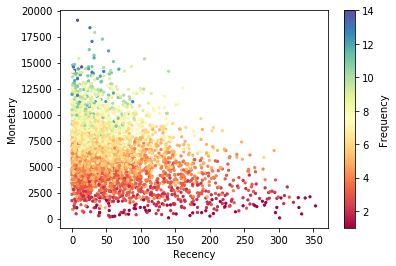

In [40]:
plt.scatter(rfmTable['recency'], rfmTable['monetary'], c=rfmTable['frequency'], s=5, cmap = "Spectral")
plt.colorbar(label='Frequency')
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

In [41]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 18.0, 0.5: 45.0, 0.75: 88.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 4049.81, 0.5: 5868.1849999999995, 0.75: 8008.922500000001}}

In [42]:
segmented_rfm = rfmTable

In [43]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [44]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(FMScore, args=('monetary',quantiles))
segmented_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,9084.45,1,1,1
2,128,3,4149.07,4,4,3
3,102,7,9525.22,4,2,1
4,195,2,1047.72,4,4,4
5,16,6,5903.20,1,2,2


In [45]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+ segmented_rfm.f_quartile.map(str)+ segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
1,7,11,9084.45,1,1,1,111
2,128,3,4149.07,4,4,3,443
3,102,7,9525.22,4,2,1,421
4,195,2,1047.72,4,4,4,444
5,16,6,5903.20,1,2,2,122


In [46]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary', ascending=False)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
2183,8,14,19071.32,1,1,1,111
1317,10,9,15370.81,1,1,1,111
1329,4,11,14818.12,1,1,1,111
322,1,11,14770.22,1,1,1,111
1460,12,8,14633.24,1,1,1,111
...,...,...,...,...,...,...,...
1137,5,9,8092.31,1,1,1,111
993,0,9,8086.79,1,1,1,111
91,9,8,8066.44,1,1,1,111


In [47]:
#df_kmeans = pd.DataFrame(columns=[segmented_rfm['recency'], segmented_rfm['monetary']])

#df_kmeans_transposed = df_kmeans.transpose()
#df_kmeans_transposed.insert(0,'index',range(1, len(df_kmeans_transposed) + 1))

#df_kmeans_transposed.head()

In [48]:
x = segmented_rfm.iloc[:, [0,1,2]].values
x

array([[7.00000e+00, 1.10000e+01, 9.08445e+03],
       [1.28000e+02, 3.00000e+00, 4.14907e+03],
       [1.02000e+02, 7.00000e+00, 9.52522e+03],
       ...,
       [5.10000e+01, 7.00000e+00, 7.67348e+03],
       [1.44000e+02, 6.00000e+00, 4.92241e+03],
       [8.40000e+01, 3.00000e+00, 1.51992e+03]])

In [49]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0,  tol = 0.001, algorithm = 'elkan').fit(x)

In [50]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.24303898e+01 5.04773270e+00 5.36142835e+03]
 [3.52074074e+01 9.12345679e+00 1.15817197e+04]
 [9.12844037e+01 3.15022936e+00 2.73000151e+03]
 [4.79144050e+01 6.94989562e+00 8.06022805e+03]]


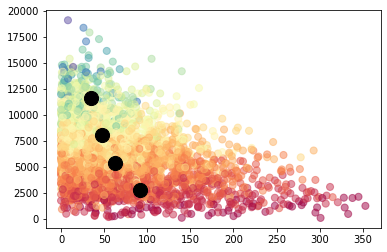

In [51]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0,  tol = 0.001, algorithm = 'elkan')
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,2], c=x[:,1], s=50, alpha=0.5, cmap = "Spectral")
plt.scatter(centroids[:, 0], centroids[:, 2], c ='black', s=200)
plt.show()

Text(0, 0.5, 'Count#')

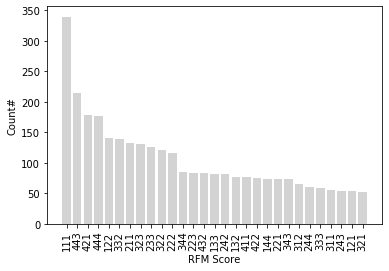

In [52]:
#Plot only RFMscores with 50 or higher customer counts

bmap = brewer2mpl.get_map('Spectral','Diverging',4,reverse=True)
colors = bmap.mpl_colors

x_filt = segmented_rfm['RFMScore'].value_counts()[segmented_rfm['RFMScore'].value_counts() > 50]
y_filt = segmented_rfm['RFMScore'].unique()[segmented_rfm['RFMScore'].value_counts() > 50]

plt.bar(y_filt, x_filt, color = 'lightgrey')
plt.xticks(rotation='vertical')
plt.xlabel("RFM Score")
plt.ylabel("Count#")

# Plotting <a name="plotting"></a>

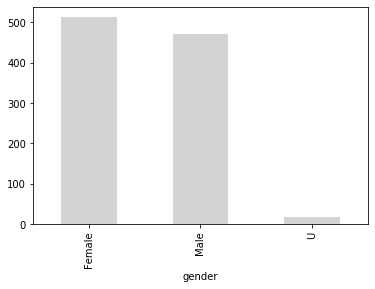

In [57]:
# Gender
df2.groupby('gender').size().plot(kind='bar', color = 'lightgrey')

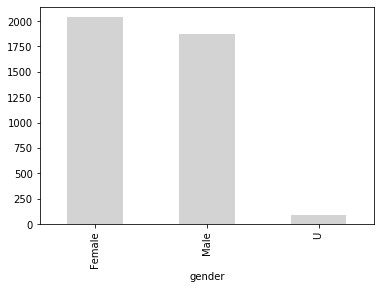

In [58]:
df3.groupby('gender').size().plot(kind='bar', color = 'lightgrey')

In [72]:
fig ()
plt.subplot(2,2,1)
df2.groupby('gender').size().plot(kind='bar', color = 'lightgrey') #no need to specify for first axis
plt.subplot(2,2,2)
df3.groupby('gender').size().plot(kind='bar', color = 'lightgrey', ax=plt.gca())


TypeError: 'Figure' object is not callable

In [ ]:
# Age difference

In [ ]:
# Profession

In [ ]:
# States